# Single-rotor Noise &ndash; Example and Validation

In [81]:
import CSV
using PyPlot

import FLOWUnsteady
import FLOWMath

# Aliases
uns = FLOWUnsteady
vlm = FLOWUnsteady.vlm
noise = FLOWUnsteady.noise
gt = FLOWUnsteady.gt
math = FLOWMath

# Create temps folder
if ispath("temps")==false; mkdir("temps"); end;

This notebook contains an example on how to run an aeroacoustic analysis using FLOWUnsteady coupled with PSU-WOPWOP. In here we show how to generate the aerodynamic solution, how to format the solution for PSU-WOPWOP (PSW, for short), run PSW to get tonal noise, use BPM to get broadband noise, and how the outputs can be visualized in Paraview and processed in a variety of forms.

We then compare results with experimental acoustic data from the literature.

## Test Case

The example shown here consists of an isolated 9.4in rotor in hover. The rotor and configuration matches the DJI 9443 propeller described in Zawodny, N. S., & Boyd, Jr., D. D., (2016), *Acoustic Characterization and Prediction of Representative, Small-scale Rotary-wing Unmanned Aircraft System Components*. See also the results shown in Alvarez, E. J., Schenk, A., Critchfield, T., and Ning, A., (2020), *Rotor-on-Rotor Aeroacoustic Interactions of Multirotor in Hover*.

This is what the actual DJI 9443 rotor looks like:

<img src="img/dji9443_00.png" alt="Pic here" width="300px">

This is the aeroacoustic output of FLOWUnsteady:

<img src=https://media.githubusercontent.com/media/byuflowlab/FLOWUnsteady/master/examples/rotornoise/vid/dji9443_ccblade01_1.gif alt="Vid here" width="700px">

## *Step 1:* Aerodynamic Solution

In this step we use any of the aerodynamic solvers in FLOWUnsteady to generate the aerodynamic loading and rotor geometry. In this example we are using the quasi-steady solver that uses blade-element momentum theory (BEMT) to generate the aerodynamic solution shown below. The BEMT solution predicts a $C_T$ of 0.0734, meanwhile Zawodny et al. reports an experimental $C_T$ of 0.0719. This results in an **excellent agreement, with a discrepancy of only 2\% between FLOWUnsteady and the experimental $C_T$**.

<img src=https://media.githubusercontent.com/media/byuflowlab/FLOWUnsteady/master/examples/rotornoise/vid/dji9443_single_bemnoise_00_ww_1.gif alt="Vid here" width="900px">

	Generating geometry...
	Generating airfoils...

Angle		Cl		Cd		Cm		Converged
0.000000	-0.014926	0.105947	-0.007908	1
-1.000000	-0.056689	0.104379	-0.014181	1
-2.000000	-0.098111	0.103717	-0.020636	1
-3.000000	-0.137255	0.104153	-0.027136	1
-4.000000	-0.169781	0.106101	-0.033548	1
-5.000000	-0.185221	0.110584	-0.039786	1
-6.000000	-0.170004	0.119092	-0.045112	1
-7.000000	-0.144512	0.129792	-0.047222	1
-8.000000	-0.135694	0.139245	-0.047179	1
-9.000000	-0.142772	0.147267	-0.046204	1
-10.000000	-0.159889	0.154573	-0.044488	1
-11.000000	-0.183774	0.161627	-0.042019	1
-12.000000	-0.212600	0.168726	-0.038764	1
-13.000000	-0.245253	0.176069	-0.034691	1
-14.000000	-0.280933	0.183803	-0.029779	1
-15.000000	-0.319026	0.192050	-0.024015	1
-16.000000	-0.359087	0.200905	-0.017384	1
-17.000000	-0.400758	0.210453	-0.009876	1
-18.000000	-0.443745	0.220765	-0.001484	1
-19.000000	-0.487814	0.231896	0.007789	0
-20.000000	-0.532783	0.243899	0.017936	0

Angle		Cl		Cd		Cm		Converged
0.000000	-0.014926	0.10

3.000000	0.793250	0.033509	-0.125104	1
4.000000	0.868915	0.039114	-0.122728	1
5.000000	0.996834	0.039507	-0.119863	1
6.000000	1.120782	0.038311	-0.112867	1
7.000000	1.226394	0.036224	-0.101858	1
8.000000	1.283961	0.034228	-0.085365	1
9.000000	1.340662	0.037719	-0.075657	1
10.000000	1.386031	0.042997	-0.066624	1
11.000000	1.385802	0.049820	-0.053933	1
12.000000	1.348947	0.062247	-0.044345	1
13.000000	1.340240	0.076954	-0.039935	1
14.000000	1.274524	0.102458	-0.046114	1
15.000000	1.179711	0.139455	-0.064813	0
16.000000	1.095906	0.190260	-0.095020	1
17.000000	1.087961	53.436869	-0.145969	0
18.000000	0.799590	0.211709	-0.084801	0
19.000000	0.800423	0.223341	-0.088782	1
20.000000	0.810977	0.237043	-0.092040	0

Angle		Cl		Cd		Cm		Converged
0.000000	-0.057576	0.041007	-0.004201	1
-1.000000	-0.160918	0.049009	0.000423	1
-2.000000	-0.179634	0.059779	-0.018027	1
-3.000000	-0.233950	0.072175	-0.021397	1
-4.000000	-0.302599	0.082993	-0.013515	1
-5.000000	-0.338361	0.097734	-0.016331	1
-6.000000	-0

/home/edoalvar/.local/lib/python2.7/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


*******************************************************************
START temps/dji9443_single_bemnoise_00/singlerotor	2020-07-07T14:34:30.936
*******************************************************************
Time step 0 out of 1200 	Particles: 0
Time step 10 out of 1200 	Particles: 0
Time step 20 out of 1200 	Particles: 0
Time step 30 out of 1200 	Particles: 0
Time step 40 out of 1200 	Particles: 0
Time step 50 out of 1200 	Particles: 0
Time step 60 out of 1200 	Particles: 0
Time step 70 out of 1200 	Particles: 0
Time step 80 out of 1200 	Particles: 0
Time step 90 out of 1200 	Particles: 0
Time step 100 out of 1200 	Particles: 0
Time step 110 out of 1200 	Particles: 0
Time step 120 out of 1200 	Particles: 0
Time step 130 out of 1200 	Particles: 0
Time step 140 out of 1200 	Particles: 0
Time step 150 out of 1200 	Particles: 0
Time step 160 out of 1200 	Particles: 0
Time step 170 out of 1200 	Particles: 0
Time step 180 out of 1200 	Particles: 0
Time step 190 out of 1200 	Particles: 0


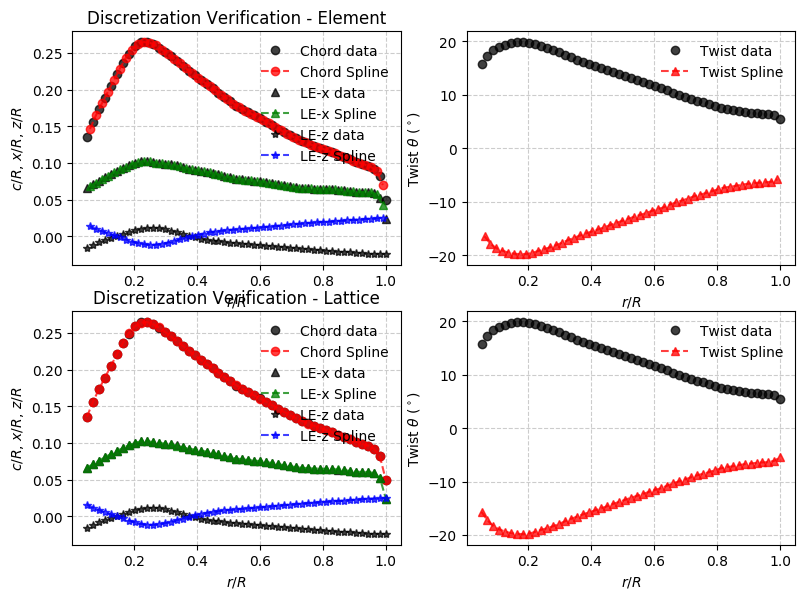

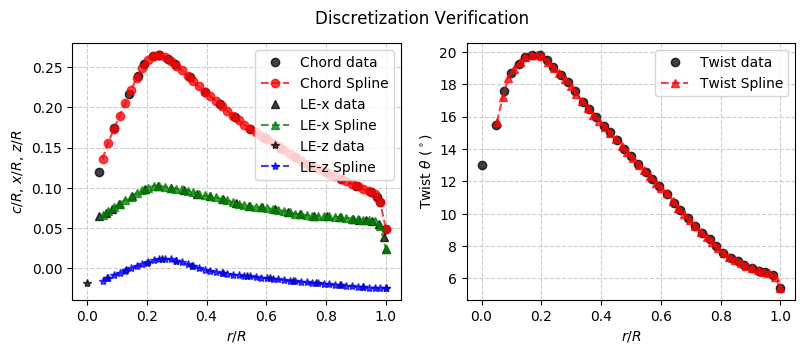

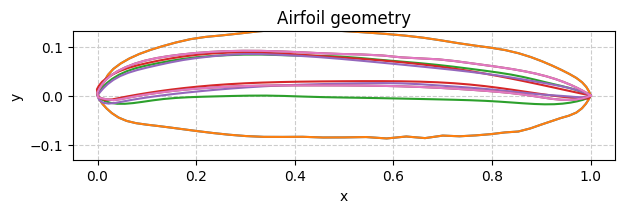

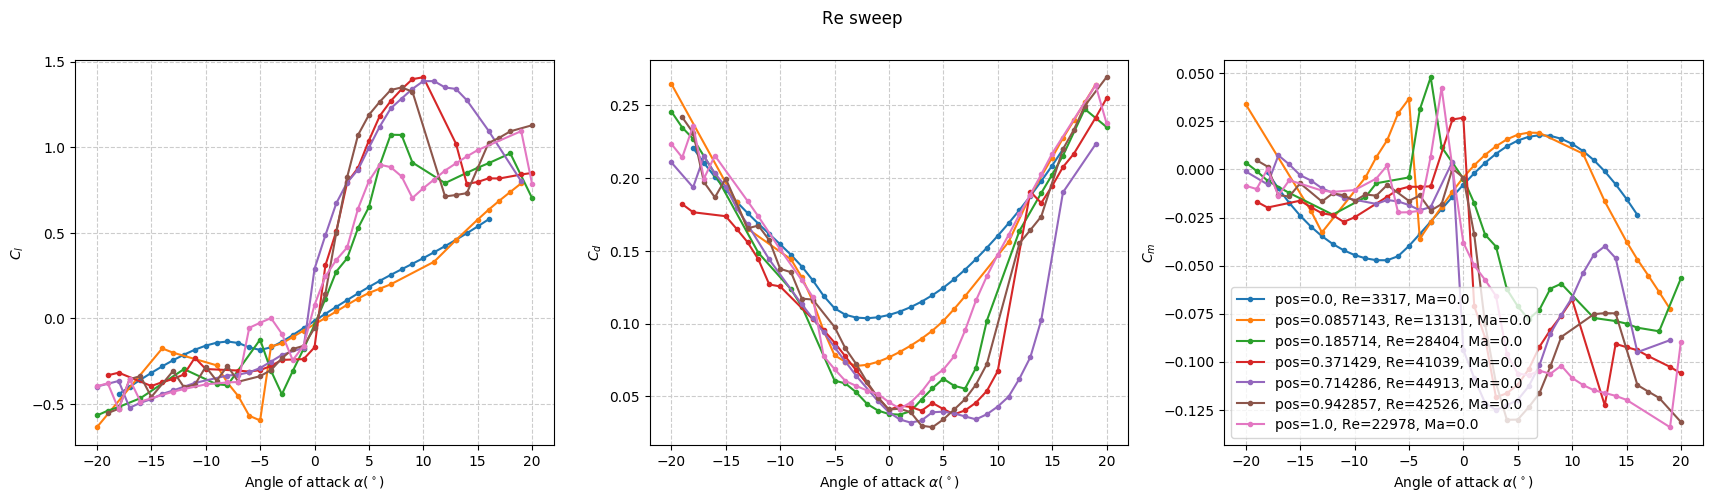

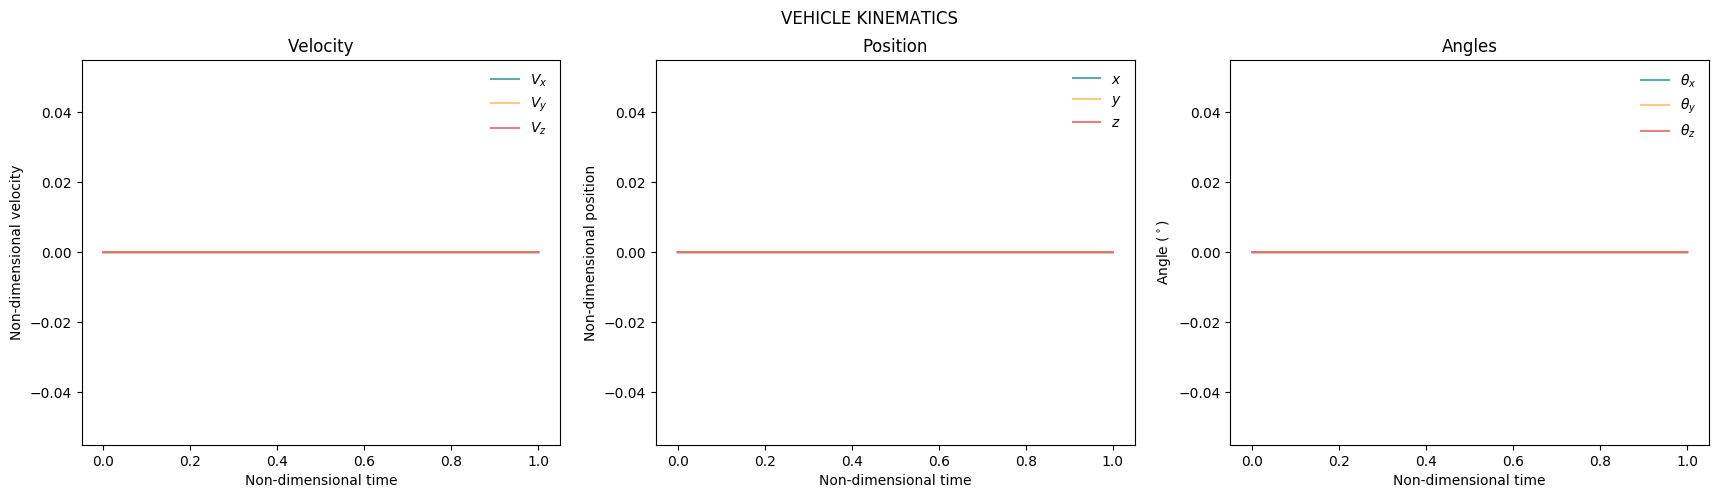

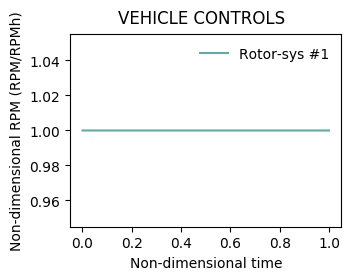

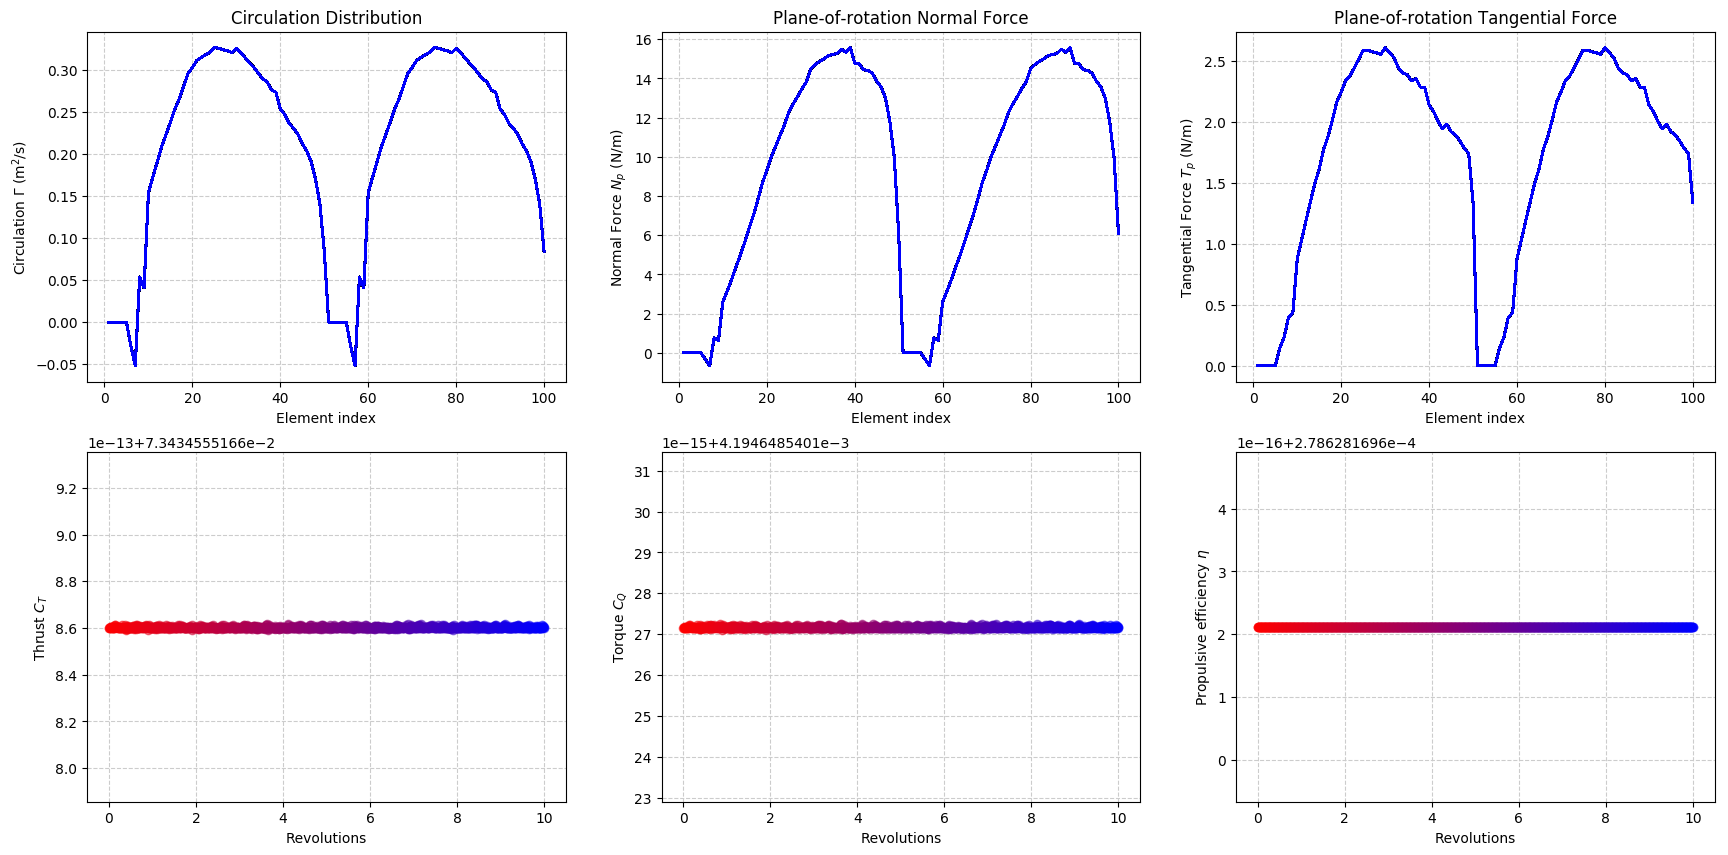

*******************************************************************
END temps/dji9443_single_bemnoise_00/singlerotor	2020-07-07T14:49:31.993
*******************************************************************
ELAPSED TIME: 0 hours 15 minutes 1 seconds


In [7]:
save_path       = "temps/dji9443_single_bemnoise_00/"  # Where to save the simulation


# ------------ PARAMETERS --------------------------------------------------
# Rotor geometry
rotor_file      = "DJI9443.csv"        # Rotor geometry
data_path       = uns.def_data_path    # Path to rotor database
pitch           = 0.0                  # (deg) collective pitch of blades
n               = 50                   # Number of blade elements
CW              = true                 # Clock-wise rotation
xfoil           = true                 # Whether to run XFOIL


# Read radius of this rotor and number of blades
R, B            = uns.read_rotor(rotor_file; data_path=data_path)[[1,3]]

# Simulation parameters
RPM             = 5400                 # RPM
J               = 0.0001               # Advance ratio Vinf/(nD)
rho             = 1.071778             # (kg/m^3) air density
mu              = 1.85508e-5           # (kg/ms) air dynamic viscosity
speedofsound    = 342.35               # (m/s) speed of sound
ReD             = 2*pi*RPM/60*R * rho/mu * 2*R   # Diameter-based Reynolds number

magVinf         = J*RPM/60*(2*R)
Vinf(X,t)       = magVinf*[1.0, 0, 0]  # (m/s) freestream velocity

# Aerodynamic solver
# VehicleType   = uns.UVLMVehicle      # Unsteady solver
VehicleType     = uns.QVLMVehicle      # Quasi-steady solver

# Solver parameters
nrevs           = 10                   # Number of revolutions in simulation
nsteps_per_rev  = 120                  # Time steps per revolution
ttot            = nrevs/(RPM/60)       # (s) total simulation time
nsteps          = nrevs*nsteps_per_rev # Number of time steps

# (Unsteady solver parameters---not used in this example)
p_per_step      = 2                    # Sheds per time step
lambda          = 2.125                # Core overlap
overwrite_sigma = lambda * 2*pi*R/(nsteps_per_rev*p_per_step) # Smoothing core size
surf_sigma      = R/10                 # Smoothing radius of lifting surface
vlm_sigma       = surf_sigma           # Smoothing radius of VLM
shed_unsteady   = true                 # Shed particles from unsteady loading
                                       # Max particles for memory pre-allocation
max_particles   = ((2*n+1)*B)*nrevs*nsteps_per_rev*p_per_step

# OUTPUT OPTIONS
run_name        = "singlerotor"
nsteps_save     = 1                    # Save vtks every this many steps
save_wopwopin   = true                 # Generate inputs for PSU-WOPWOP
prompt          = false                # Whether to promp the user
verbose         = true
plot_disc       = true                 # Plot blade discretization for debugging




# ------------ SIMULATION SETUP --------------------------------------------
# Generate rotor
rotor = uns.generate_rotor(rotor_file; pitch=pitch,
                                        n=n, CW=CW, ReD=ReD, altReD=[RPM, J, mu/rho],
                                        verbose=verbose, xfoil=xfoil,
                                        data_path=data_path,
                                        plot_disc=plot_disc)

# ----- VEHICLE DEFINITION
# System of all FLOWVLM objects
system = vlm.WingSystem()
vlm.addwing(system, "Rotor1", rotor)

# Systems of rotors
rotors = vlm.Rotor[rotor]   # Defining this rotor as its own system
rotor_systems = (rotors,)

# Wake-shedding system (don't include the rotor if quasi-steady vehicle)
wake_system = vlm.WingSystem()

if VehicleType != uns.QVLMVehicle
    vlm.addwing(wake_system, "Rotor1", rotor)
else
    # Mute colinear warnings. This is needed since the quasi-steady solver
    #   will probe induced velocities at the lifting line of the blade
    uns.vlm.VLMSolver._mute_warning(true)
end

# Define vehicle object
vehicle = VehicleType(   system;
                            rotor_systems=rotor_systems,
                            wake_system=wake_system
                         )


# ----- MANEUVER DEFINITION
RPM_fun(t) = 1.0                # RPM (normalized by reference RPM) as a
                                # function of normalized time
angle = ()                      # Angle of each tilting system (none in this case)
sysRPM = (RPM_fun, )            # RPM of each rotor system
Vvehicle(t) = zeros(3)          # Translational velocity of vehicle over Vcruise
anglevehicle(t) = zeros(3)      # (deg) angle of the vehicle

# Define Maneuver object
maneuver = uns.KinematicManeuver(angle, sysRPM, Vvehicle, anglevehicle)

# Plot maneuver path and controls
uns.plot_maneuver(maneuver; vis_nsteps=nsteps)


# ----- SIMULATION DEFINITION
RPMref = RPM
Vref = 0.0

tinit = 0.0                                  # (s) initial time
Vinit = Vref*maneuver.Vvehicle(tinit/ttot)   # (m/s) initial vehicle velocity
angle1 = maneuver.anglevehicle(tinit/ttot)   # (rad/s) initial vehicle angular velocity
angle2 = maneuver.anglevehicle(tinit/ttot + 1e-12)
Winit = pi/180 * (angle2-angle1)/(ttot*1e-12)

simulation = uns.Simulation(vehicle, maneuver, Vref, RPMref, ttot;
                                            Vinit=Vinit, Winit=Winit, t=tinit)


# ----- MONITOR DEFINITION
monitor = uns.generate_monitor_rotors( rotors, J, rho, RPM, nsteps;
                                    t_scale=RPM/60,        # Time scaling factor for plots
                                    t_lbl="Revolutions",   # x-axis label
                                    # OUTPUT OPTIONS
                                    save_path=save_path,
                                    run_name="rotor",
                                    figname="monitor_rotor",
                                    disp_conv=verbose,)


# ------------ RUN SIMULATION ----------------------------------------------
pfield = uns.run_simulation(simulation, nsteps;
                                  # SIMULATION OPTIONS
                                  Vinf=Vinf,
                                  rho=rho,
                                  mu=mu,
                                  sound_spd=speedofsound,
                                  # SOLVERS OPTIONS
                                  p_per_step=p_per_step,
                                  overwrite_sigma=overwrite_sigma,
                                  vlm_sigma=vlm_sigma,
                                  surf_sigma=surf_sigma,
                                  max_particles=max_particles,
                                  shed_unsteady=shed_unsteady,
                                  extra_runtime_function=monitor,
                                  # OUTPUT OPTIONS
                                  save_path=save_path,
                                  run_name=run_name,
                                  nsteps_save=nsteps_save,
                                  save_wopwopin=save_wopwopin,
                                  prompt=prompt,
                                  verbose=verbose,
                             );     

In [8]:
8.6*1e-13 + 7.343455e-2

0.07343455000086001

## *Step 2:* Aeroacoustic Solution &ndash; Tonal Noise

In this step, we feed the aerodynamic solution to PSU-WOPWOP to obtain the tonal noise in a circular array of microphones located at 1.905 m from the rotor hub as shown below.

<img src=https://media.githubusercontent.com/media/byuflowlab/FLOWUnsteady/master/examples/rotornoise/vid/ransnoise_dji9443_single_new01_00_2.gif alt="Vid here" width="500px">

In [ ]:
# Path from where to read aerodynamic solution
read_path       = pwd()*"/temps/dji9443_single_bemnoise_00/"
# Path where to save PSU-WOPWOP's outputs
save_path       = "temps/dji9443_single_bemnoise_00_psw00/"
# Path to PSU-WOPWOP binary (not included in FLOWUnsteady)
wopwopbin       = "/home/edoalvar/Dropbox/FLOWResearch/OtherCodes/PSU-WOPWOP_v3.4.3_B3385/wopwop3_serial"
# Run name (prefix of rotor files to read)
run_name        = "singlerotor"

# ------------ PARAMETERS --------------------------------------------------
# NOTE: Make sure that these parameters match what was used in the 
#       aerodynamic solution.

# Rotor geometry
rotor_file      = "DJI9443.csv"        # Rotor geometry
data_path       = uns.def_data_path    # Path to rotor database

# Read radius of this rotor and number of blades
R, B            = uns.read_rotor(rotor_file; data_path=data_path)[[1,3]]

rotorsystems    = [[B]]                # rotorsystems[si][ri] is the number of blades of the ri-th rotor in the si-th system

# Simulation parameters
RPM             = 5400                 # RPM is just a reference value to go from nrevs to simulation time
rho             = 1.071778             # (kg/m^3) air density
speedofsound    = 342.35               # (m/s) speed of sound

# Solver parameters
ww_nrevs        = 9                    # Number of revolutions in PSU-WOPWOP
ww_nsteps_per_rev = 120                # Number of steps per revolution in PSU-WOPWOP
periodic        = true                 # Periodic aerodynamic solution

# Observer definition: Circular array of microphones
sph_R           = 1.905                # (m) radial distance from rotor hub
sph_nR          = 0
sph_nphi        = 0
sph_ntht        = 360                  # Number of microphones
sph_thtmin      = 0                    # (deg) first microphone's angle
sph_thtmax      = 360                  # (deg) last microphone's angle
sph_phimax      = 180
sph_rotation    = [90, 0, 0]           # Rotation of grid of microphones
obs_name = "circle_mic_array"          # Observer file name

# Observer definition: Single microphone
Rmic = 1.905                           # (m) radial distance from rotor hub
anglemic = 90*pi/180                   # (rad) microphone angle from plane of rotation (- below, + above)
                                       # 0deg is at the plane of rotation, 90deg is upstream
microphoneX = nothing                  # Comment and uncomment this to switch from array to single microphone
# microphoneX = Rmic*[-sin(anglemic), cos(anglemic), 0]


# ------------ RUN PSU-WOPWOP ----------------------------------------------
uns.run_noise_wopwop(read_path, run_name, RPM, rho, speedofsound, rotorsystems, 
                        ww_nrevs, ww_nsteps_per_rev, save_path, wopwopbin;
                        # ---------- OBSERVERS -------------------------
                        sph_R=sph_R,
                        sph_nR=sph_nR, sph_ntht=sph_ntht,
                        sph_nphi=sph_nphi, sph_phimax=sph_phimax,
                        sph_rotation=sph_rotation,
                        sph_thtmin=sph_thtmin, sph_thtmax=sph_thtmax,
                        microphoneX=microphoneX,
                        # ---------- SIMULATION OPTIONS ----------------
                        periodic=periodic,
                        # ---------- INPUT OPTIONS ---------------------
                        num_min=1,                      # Start reading loading files from this number
                        # ---------- OUTPUT OPTIONS --------------------
                        verbose=true, v_lvl=0,
                        prompt=false, debug_paraview=false,
                        debuglvl=1,                     # WW debug level
                        observerf_name="observergrid",  # .xyz file with observer grid
                        case_name="runcase",            # Name of case to create and run
                        )

## *Optional Step:* Processing VTKs

When debugging things, I like to convert the PSU-WOPWOP's inputs back to vtk and visualize them in Paraview. This helps verify that we are passing the right things to PSU-WOPWOP. In order to do that, the following lines grab those inputs files that are formated for PSU-WOPWOP and converts them into vtk files.

In [12]:
read_path = "temps/dji9443_single_bemnoise_00_psw00/runcase/" # Path to PSW's input files
save_path = read_path*"../vtks/"                              # Where to save VTK files

# Create save path
noise.gt.create_path(save_path, true)

# Identify loft and compact PSW files
wopfiles = [fname for fname in readdir(read_path)
            if occursin("loft.wop", fname) || occursin("compact.wop", fname)]

vtk_str = "$save_path/"
            
for fname in wopfiles
    
    println("*"^73)
    println("*\t\tREADING $fname")
    println("*"^73)

    # Identifies loading file if compact patch
    if occursin("compact.wop", fname)
        lfname = fname[1:findfirst("compact.wop", fname)[1]-1]*"loading_periodic.wop"
    else
        lfname = nothing
    end

    # Convert from PSW to VTK
    vtk_str *= noise.geomwopwop2vtk(fname; read_path=read_path,
                                loading_file=lfname, verbose=true,
                                save_path=save_path)[end]
end

println("Generated the following files:\n\t$(vtk_str)")

*************************************************************************
*		READING singlerotor_Rotor1_Blade1_loft.wop
*************************************************************************
Int32[42]	 # Magic number
Int32[1, 0]	 # Version
N/m^2                           	 # Units
Geometry input file for PSU-WOPWOP (Format v1.0)
------------------------------------------------
Created by FLOWNoise (written by Eduardo Alvarez)
https://github.com/byuflowlab/FLOWNoise
Creation date: 2020-07-07T15:41:43.596
Units: SI
Format: Unstructured grid, face-centered                                                                                                                                                                                                                                                                                                                                                                                                                                                      

Generated the following files:
	temps/dji9443_single_bemnoise_00_psw00/runcase/../vtks//singlerotor_Rotor1_Blade1_loft_vtkpatch...vtk;singlerotor_Rotor1_Blade2_loft_vtkpatch...vtk;singlerotor_Sys1_Rotor1_Blade1_compact_vtkcompactpatch...vtk;singlerotor_Sys1_Rotor1_Blade2_compact_vtkcompactpatch...vtk;


## *Step 3:* Aeroacoustic Solution &ndash; Broadband Noise

In [72]:
# Path where to save BPM's outputs
save_path       = "temps/dji9443_single_bemnoise_00_bpm00/"

# ------------ PARAMETERS --------------------------------------------------
# NOTE: Make sure that these parameters match what was used in the 
#       aerodynamic solution.

# Rotor geometry
rotor_file      = "DJI9443.csv"        # Rotor geometry
data_path       = uns.def_data_path    # Path to rotor database
pitch           = 0.0                  # (deg) collective pitch of blades
n               = 50                   # Number of blade elements
CW              = true                 # Clock-wise rotation


# Read radius of this rotor and number of blades
R, B            = uns.read_rotor(rotor_file; data_path=data_path)[[1,3]]

# Simulation parameters
RPM             = 5400                 # RPM
J               = 0.0001               # Advance ratio Vinf/(nD)
rho             = 1.071778             # (kg/m^3) air density
mu              = 1.85508e-5           # (kg/ms) air dynamic viscosity
speedofsound    = 342.35               # (m/s) speed of sound

magVinf         = J*RPM/60*(2*R)
Vinf(X,t)       = magVinf*[1.0, 0, 0]  # (m/s) freestream velocity

# BPM parameters
noise_correction= 0.65                 # Calibration parameter
TE_thickness    = 16.0                 # (deg) trailing edge thickness
freq_bins       = uns.BPM.default_f    # Frequency bins (default is one-third octave band)

# Observer definition: Circular array of microphones
sph_R           = 1.905                # (m) radial distance from rotor hub
sph_nR          = 0
sph_nphi        = 0
sph_ntht        = 360                  # Number of microphones
sph_thtmin      = 0                    # (deg) first microphone's angle
sph_thtmax      = 360                  # (deg) last microphone's angle
sph_phimax      = 180
sph_rotation    = [90, 0, 0]           # Rotation of grid of microphones

# Observer definition: Single microphone
Rmic = 1.905                           # (m) radial distance from rotor hub
anglemic = 90*pi/180                   # (rad) microphone angle from plane of rotation (- below, + above)
                                       # 0deg is at the plane of rotation, 90deg is upstream
microphoneX = nothing                  # Comment and uncomment this to switch from array to single microphone
# microphoneX = Rmic*[-sin(anglemic), cos(anglemic), 0]

# OUTPUT OPTIONS
prompt          = true                 # Whether to promp the user
verbose         = false
plot_disc       = false                # Plot blade discretization for debugging

# ------------ GENERATE GEOMETRY -------------------------------------------
# Generate rotor
rotor = uns.generate_rotor(rotor_file; pitch=pitch,
                                        n=n, CW=CW, ReD=0.0,
                                        verbose=verbose, xfoil=false,
                                        data_path=data_path,
                                        plot_disc=plot_disc)
rotors = vlm.Rotor[rotor]

# ------------ RUN BPM -----------------------------------------------------
uns.run_noise_bpm(rotors, RPM, Vinf, rho, mu, speedofsound,
                                save_path;
                                # ---------- OBSERVERS -------------------------
                                sph_R=sph_R,
                                sph_nR=sph_nR, sph_ntht=sph_ntht,
                                sph_nphi=sph_nphi, sph_phimax=sph_phimax,
                                sph_rotation=sph_rotation,
                                sph_thtmin=sph_thtmin, sph_thtmax=sph_thtmax,
                                microphoneX=microphoneX,
                                # ---------- BPM OPTIONS -----------------------
                                noise_correction=noise_correction,
                                TE_thickness=TE_thickness,
                                freq_bins=freq_bins,
                                # ---------- OUTPUT OPTIONS --------------------
                                prompt=prompt
                                );



Folder temps/dji9443_single_bemnoise_00_bpm00/ already exists. Remove? (y/n) stdin> y




## *Step 4:* Processing and Plotting Results

In this section we process the data to add the tonal and broadband together, and plot the results.

### Read Data

In this cell we read both the tonal and broadband noise solutions that we have previously generated:

In [2]:
# Dataset to read and associated information
dataset_infos = [   # (label, PSW solution, BPM solution, BPM freq bins, line style, color)
                    ("FLOWUnsteady w/BEMT", "temps/dji9443_single_bemnoise_00_psw00/runcase/", 
                             "temps/dji9443_single_bemnoise_00_bpm00", uns.BPM.default_f, "-", "r")
                ];

datasets_psw = Dict()     # Stores PSW data in this dictionary
datasets_bpm = Dict()     # Stores BPM data in this dictionary

# Fields to read
psw_fieldnames = ["pressure", "spl_spectrum", "OASPLdB", "OASPLdBA"]
bpm_fieldnames = ["spl_spectrum", "splA_spectrum", "OASPLdB", "OASPLdBA"]

# Read each dataset
for (lbl, psw_read_path, bpm_read_path) in dataset_infos
    
    datasets_psw[lbl] = noise.fetch_pswdataset(psw_read_path; fieldnames=psw_fieldnames)
    datasets_bpm[lbl] = noise.fetch_bpmdataset(bpm_read_path; fieldnames=bpm_fieldnames)
    
end

************************************************************************
*	Reading dataset temps/dji9443_single_bemnoise_00_psw00/runcase/
************************************************************************
Reading output file...
Found 360x1 grid in WOPWOP output with 1080 time steps.
	Reading field ObserverTimes...
		Reading time t=1 out of 1080
		Reading time t=271 out of 1080
		Reading time t=541 out of 1080
		Reading time t=811 out of 1080
	Reading field ThicknessAcousticPressure...
		Reading time t=1 out of 1080
		Reading time t=271 out of 1080
		Reading time t=541 out of 1080
		Reading time t=811 out of 1080
	Reading field LoadingAcousticPressure...
		Reading time t=1 out of 1080
		Reading time t=271 out of 1080
		Reading time t=541 out of 1080
		Reading time t=811 out of 1080
	Reading field TotalAcousticPressure...
		Reading time t=1 out of 1080
		Reading time t=271 out of 1080
		Reading time t=541 out of 1080
		Reading time t=811 out of 1080
Reading output file...
Found 36

Also, we need to recreate the circular array of microphones that was used when generating the aeroacoustic solution:

In [3]:
# Make sure this grid is the same used as an observer by the aeroacoustic solution
sph_R = 1.905                    # (m) radial distance from rotor hub
sph_nR = 0
sph_nphi = 0
sph_ntht = 360                   # Number of microphones
sph_thtmin = 0                   # (deg) first microphone's angle
sph_thtmax = 360                 # (deg) last microphone's angle
sph_phimax = 180
sph_rotation = [90, 0, 0]        # Rotation of grid of microphones

# Create observer grid
grid = noise.observer_sphere(sph_R, sph_nR, sph_ntht, sph_nphi; 
                                thtmin=sph_thtmin, thtmax=sph_thtmax, phimax=sph_phimax,
                                rotation=sph_rotation);

# This function calculates the angle that corresponds to every microphone
pangle(i) = -180/pi*atan(gt.get_node(grid, i)[1], gt.get_node(grid, i)[2])

pangle (generic function with 1 method)

### Pressure Waveform

In here we plot the pressure waveform at some of the microphones. **This pressure waveform includes only the tonal component**, as given by PSU-WOPWOP.

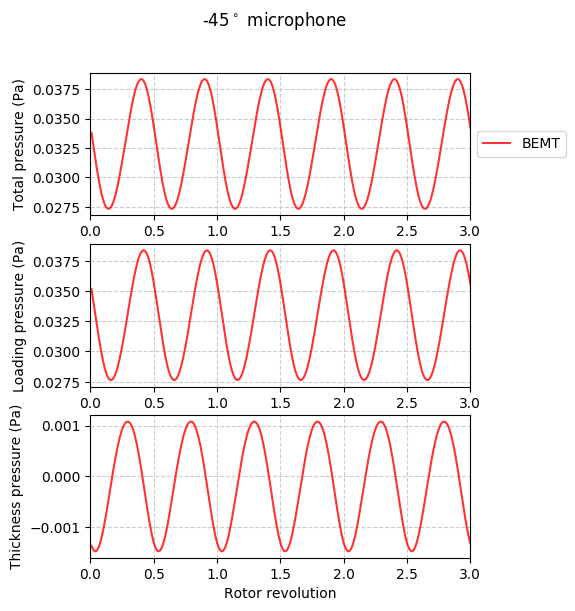

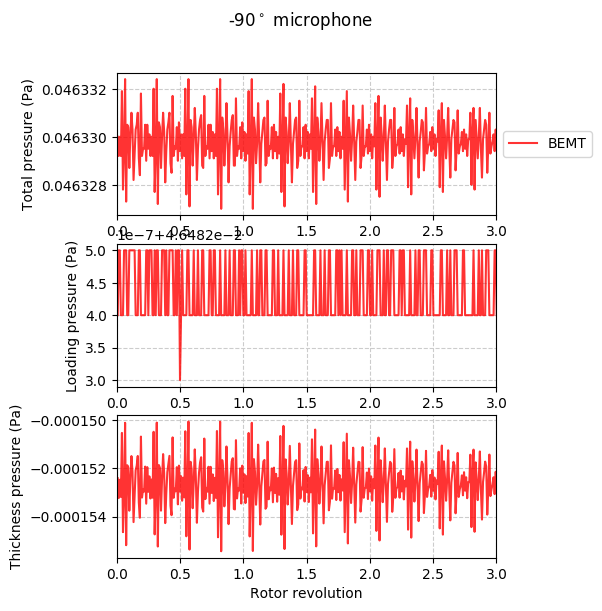

In [85]:
microphones  = [-45, -90]            # (deg) microphones to plot
RPM          = 5400                  # RPM of solution

fieldname = "pressure"               # Field to plot
mici         = -microphones .+ 181   # Index of every microphone

for mici in mics

    figure(figsize=[7*1, 3*3]*0.7)
    suptitle("$(Int(round(pangle(mici))))"*L"$^\circ$ microphone")
    
    for (ploti, (ylbl, dlbl)) in enumerate([
                                            ("Total pressure (Pa)", "TotalAcousticPressure"),
                                            ("Loading pressure (Pa)", "LoadingAcousticPressure"),
                                            ("Thickness pressure (Pa)", "ThicknessAcousticPressure"),
                                          ])
        subplot(310+ploti) 
        if ploti==3; xlabel("Rotor revolution"); end;
        xlim([0, 3])
        ylabel(ylbl)
        PyPlot.grid(true, which="major", color="0.8", linestyle="--")
        PyPlot.grid(true, which="minor", color="0.8", linestyle="--")


        for (di, (lbl, read_path, _, _, stl, clr)) in enumerate(dataset_infos)

            data = datasets_psw[lbl][fieldname]
            xi = data["hs"]["ObserverTimes"]
            yi = data["hs"][dlbl]

            plot(data["field"][mici, 1, 2:end, xi]*(RPM/60),
                data["field"][mici, 1, 2:end, yi],  stl, alpha=0.8, label=lbl, color=clr)

        end

        if ploti==1; legend(loc="center left", bbox_to_anchor=(1, 0.5)); end;
    end
    
end

### SPL Spectrum

Here we compare the SPL spectrum at the microphone $-45^\circ$ below the plane of rotation with the experimental data reported by Zawodny, N. S., & Boyd, Jr., D. D., (2016), *Acoustic Characterization and Prediction of Representative, Small-scale Rotary-wing Unmanned Aircraft System Components*.

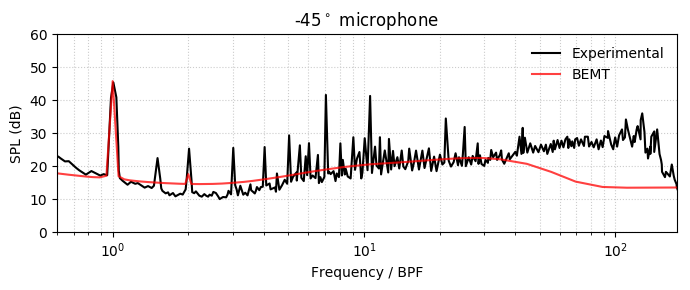

In [87]:
microphone   = -45                   # (deg) microphone to plot
RPM          = 5400                  # RPM of solution
BPF          = 2*RPM/60              # Blade passing frequency

fieldname    = "spl_spectrum"        # Field to plot
mici         = -microphone .+ 181    # Index of each microphone


figure(figsize=[7, 3])

# Plot experimental data from Zawodny et al., Fig. 9
data = CSV.read(joinpath("data", "zawodnydigitization2","zawodny_dji9443_spl_5400_01.csv"))
plot(data[!, 1]/BPF, data[!, 2], "-", label="Experimental", color="k")

# Plot datasets
for (lbl, _, _, freq_bins_bpm, stl, clr) in dataset_infos

    # Fetch tonal noise
    data_psw = datasets_psw[lbl][fieldname]
    xi = data_psw["hs"]["Frequency"]
    yi = data_psw["hs"]["Total_dB"]
    freqs_psw = data_psw["field"][mici, 1, 2:end, xi]
    spl_psw = data_psw["field"][mici, 1, 2:end, yi]
    
    # Fetch broadband noise
    data_bpm = datasets_bpm[lbl][fieldname]
    org_spl_bpm = data_bpm["field"][:, mici]
    
    # Define the range of frequency as the union of both components
    freqs = freqs_psw                       # Grab PSW frequency range
    if freqs_psw[end] < freq_bins_bpm[end]  # Add BPM range
        bpm_i = findfirst( f -> f > freqs_psw[end], freq_bins_bpm)
        freqs = vcat(freqs, freq_bins_bpm[bpm_i:end])
        spl_psw = vcat(spl_psw, [-30.0 for i in bpm_i:length(freq_bins_bpm)])
    end
    
    # Interpolate broadband data into the same frequencies than tonal data
    spl_bpm = math.akima(freq_bins_bpm, org_spl_bpm, freqs)
    
    # Add tonal and broadband SPL together
    spl = noise.addSPL(spl_psw, spl_bpm)

    plot(freqs/BPF, spl,  stl, alpha=0.75, label=lbl, color=clr)

end

title("$(Int(round(pangle(mici))))"*L"$^\circ$ microphone")
xlim([6*10.0^(-1.0), 1.75e2])
xscale("log")
xlabel("Frequency / BPF")
ylim([0, 60])
ylabel("SPL (dB)")
PyPlot.grid(true, which="major", color="0.8", linestyle=":")
PyPlot.grid(true, which="minor", color="0.8", linestyle=":")
legend(loc="best", frameon=false)

tight_layout()

### A-weighted SPL Spectrum

Same than previous plot, but A-weighted.

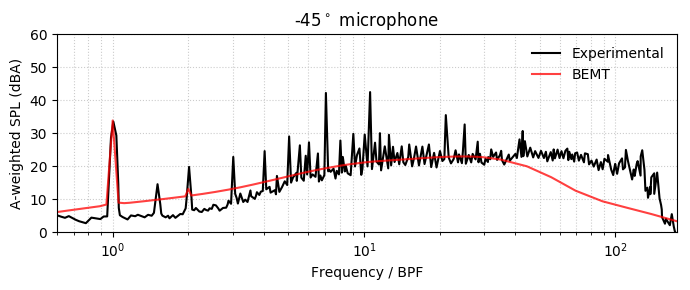

In [94]:
microphone   = -45                   # (deg) microphone to plot
RPM          = 5400                  # RPM of solution
BPF          = 2*RPM/60              # Blade passing frequency

fieldname    = "spl_spectrum"        # Field to plot
mici         = -microphone .+ 181   # Index of every microphone


figure(figsize=[7, 3])

# Plot experimental data from Zawodny et al., Fig. 9
data = CSV.read(joinpath("data", "zawodnydigitization2","zawodny_dji9443_spl_5400_01.csv"))
splA_exp = noise.aWeight.(data[!, 1], data[!, 2])
plot(data[!, 1]/BPF, splA_exp, "-", label="Experimental", color="k")

# Plot datasets
for (lbl, _, _, freq_bins_bpm, stl, clr) in dataset_infos

    # Fetch tonal noise
    data_psw = datasets_psw[lbl][fieldname]
    xi = data_psw["hs"]["Frequency"]
    yi = data_psw["hs"]["Total_dBA"]
    freqs_psw = data_psw["field"][mici, 1, 2:end, xi]
    spl_psw = data_psw["field"][mici, 1, 2:end, yi]
    
    # Fetch broadband noise
    data_bpm = datasets_bpm[lbl]["splA_spectrum"]
    org_spl_bpm = data_bpm["field"][:, mici]
    
    # Define the range of frequency as the union of both components
    freqs = freqs_psw                       # Grab PSW frequency range
    if freqs_psw[end] < freq_bins_bpm[end]  # Add BPM range
        bpm_i = findfirst( f -> f > freqs_psw[end], freq_bins_bpm)
        freqs = vcat(freqs, freq_bins_bpm[bpm_i:end])
        spl_psw = vcat(spl_psw, [-30.0 for i in bpm_i:length(freq_bins_bpm)])
    end
    
    # Interpolate broadband data into the same frequencies than tonal data
    spl_bpm = math.akima(freq_bins_bpm, org_spl_bpm, freqs)
    
    # Add tonal and broadband SPL together
    spl = noise.addSPL(spl_psw, spl_bpm)

    plot(freqs/BPF, spl,  stl, alpha=0.75, label=lbl, color=clr)

end

title("$(Int(round(pangle(mici))))"*L"$^\circ$ microphone")
xlim([6*10.0^(-1.0), 1.75e2])
xscale("log")
xlabel("Frequency / BPF")
ylim([0, 60])
ylabel("A-weighted SPL (dBA)")
PyPlot.grid(true, which="major", color="0.8", linestyle=":")
PyPlot.grid(true, which="minor", color="0.8", linestyle=":")
legend(loc="best", frameon=false)

tight_layout()

### Tonal Directivity &ndash; First BPF

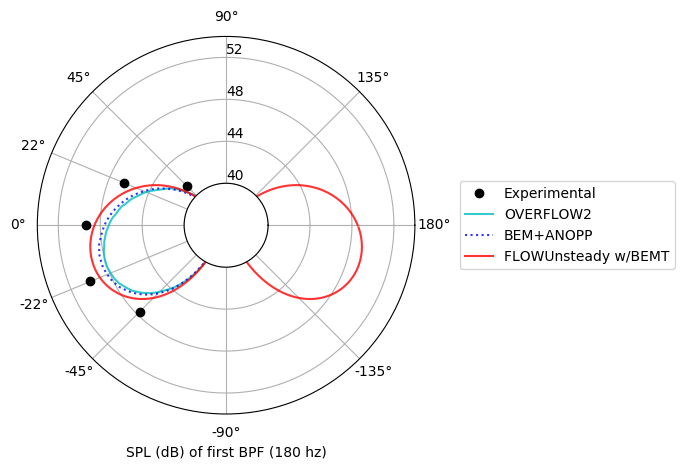

In [44]:
BPFi         = 1                     # BPF multiple to plot
RPM          = 5400                  # RPM of solution
BPF          = 2*RPM/60              # Blade passing frequency

fieldname    = "spl_spectrum"        # Field to plot

# Plot experimental and computational data reported by Zawodny et al., Fig. 14
data_exp = CSV.read(joinpath("data", "zawodnydigitization2",
                                        "zawodny_fig14_topright_exp00.csv"), datarow=1)
data_of = CSV.read(joinpath("data",  "zawodnydigitization2",
                                        "zawodny_fig14_topright_of00.csv"), datarow=1)
data_pas = CSV.read(joinpath("data", "zawodnydigitization2",
                                        "zawodny_fig14_topright_pas00.csv"), datarow=1)

polar(pi/180*data_exp[!, 2], data_exp[!, 1], "o", label="Experimental", color="k")
polar(pi/180*data_of[!, 2], data_of[!, 1], "-", label="OVERFLOW2", alpha=0.8, color="c")
polar(pi/180*data_pas[!, 2], data_pas[!, 1], ":b", label="BEM+ANOPP", alpha=0.8)

# Grab angles
pointangles = pangle.(1:grid.nnodes)

# Plot datasets
for (lbl, _, _, freq_bins_bpm, stl, clr) in dataset_infos

    # Fetch tonal noise
    data_psw = datasets_psw[lbl][fieldname]
    yi = data_psw["hs"]["Total_dB"]
    fi = data_psw["hs"]["Frequency"]
    
    df = data_psw["field"][1, 1, 2, fi] - data_psw["field"][1, 1, 1, fi] # Frequency step
    freqi = ceil(Int, BPFi*BPF/df + 1)                           # Frequency index
    freq = data_psw["field"][1, 1, freqi, fi]                    # Frequency
    # _lbl = " @ $(data_psw["field"][1, 1, freqi, fi]) Hz"         # Frequency string
    _lbl = ""
    
    spl_psw = data_psw["field"][:, 1, freqi, yi]
    
    # Fetch broadband noise
    data_bpm = datasets_bpm[lbl][fieldname]
    spl_bpm = [math.akima(freq_bins_bpm, data_bpm["field"][:, mici], freq) for mici in 1:grid.nnodes]
    
    # Add tonal and broadband SPL together
    spl = noise.addSPL(spl_psw, spl_bpm)
    
    
    polar(pi/180*pointangles, spl, stl, label=lbl*_lbl, alpha=0.8, color=clr)
end

ax = gca()
ax.set_theta_zero_location("W")
ax.set_theta_direction(-1)
ax.set_thetalim(pi/180*180*[1, -1])
ax.set_rlabel_position(90)
ax.set_rticks(40:4:52)
ax.set_rlim([40, 54])
ax.set_rorigin(36)
ax.set_thetagrids(collect(-180:45/2:180)[[3, 5, 7, 8, 9, 10, 11, 13, 15, 17]])
ax.grid(true)
xlabel("SPL (dB) of first BPF ($(ceil(Int, BPFi*BPF)) hz)")
legend(loc="center left", bbox_to_anchor=(1.1, 0.5))
tight_layout();

### Tonal Directivity &ndash; Second BPF

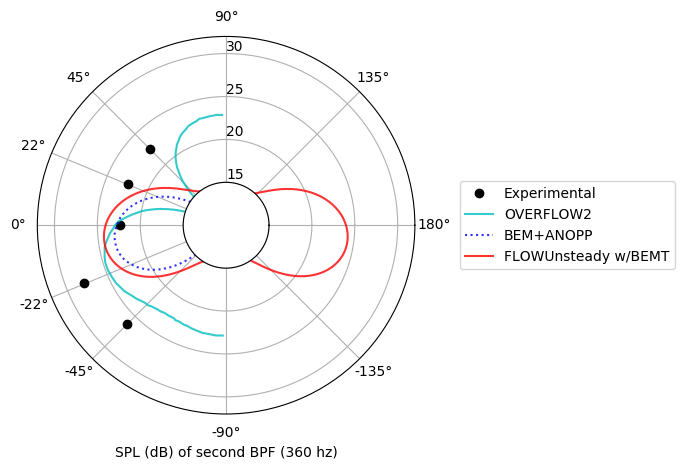

In [49]:
BPFi         = 2                     # BPF multiple to plot
RPM          = 5400                  # RPM of solution
BPF          = 2*RPM/60              # Blade passing frequency

fieldname    = "spl_spectrum"        # Field to plot

# Plot experimental and computational data reported by Zawodny et al., Fig. 14
data_exp = CSV.read(joinpath("data", "zawodnydigitization2",
                                        "zawodny_fig14_bottomright_exp00.csv"), datarow=1)
data_of = CSV.read(joinpath("data",  "zawodnydigitization2",
                                        "zawodny_fig14_bottomright_of00.csv"), datarow=1)
data_pas = CSV.read(joinpath("data", "zawodnydigitization2",
                                        "zawodny_fig14_bottomright_pas00.csv"), datarow=1)

polar(pi/180*data_exp[!, 2], data_exp[!, 1], "o", label="Experimental", color="k")
polar(pi/180*data_of[!, 2], data_of[!, 1], "-", label="OVERFLOW2", alpha=0.8, color="c")
polar(pi/180*data_pas[!, 2], data_pas[!, 1], ":b", label="BEM+ANOPP", alpha=0.8)

# Grab angles
pointangles = pangle.(1:grid.nnodes)

# Plot datasets
for (lbl, _, _, freq_bins_bpm, stl, clr) in dataset_infos

    # Fetch tonal noise
    data_psw = datasets_psw[lbl][fieldname]
    yi = data_psw["hs"]["Total_dB"]
    fi = data_psw["hs"]["Frequency"]
    
    df = data_psw["field"][1, 1, 2, fi] - data_psw["field"][1, 1, 1, fi] # Frequency step
    freqi = ceil(Int, BPFi*BPF/df + 1)                           # Frequency index
    freq = data_psw["field"][1, 1, freqi, fi]                    # Frequency
    # _lbl = " @ $(data_psw["field"][1, 1, freqi, fi]) Hz"         # Frequency string
    _lbl = ""
    
    spl_psw = data_psw["field"][:, 1, freqi, yi]
    
    # Fetch broadband noise
    data_bpm = datasets_bpm[lbl][fieldname]
    spl_bpm = [math.akima(freq_bins_bpm, data_bpm["field"][:, mici], freq) for mici in 1:grid.nnodes]
    
    # Add tonal and broadband SPL together
    spl = noise.addSPL(spl_psw, spl_bpm)
    
    
    polar(pi/180*pointangles, spl, stl, label=lbl*_lbl, alpha=0.8, color=clr)
end

ax = gca()
ax.set_theta_zero_location("W")
ax.set_theta_direction(-1)
ax.set_thetalim(pi/180*180*[1, -1])
ax.set_rlabel_position(90)
ax.set_rticks(15:5:30)
ax.set_rlim([15, 32])
ax.set_rorigin(10)
ax.set_thetagrids(collect(-180:45/2:180)[[3, 5, 7, 8, 9, 10, 11, 13, 15, 17]])
ax.grid(true)
xlabel("SPL (dB) of second BPF ($(ceil(Int, BPFi*BPF)) hz)")
legend(loc="center left", bbox_to_anchor=(1.1, 0.5))
tight_layout();

### Overall SPL Directivity

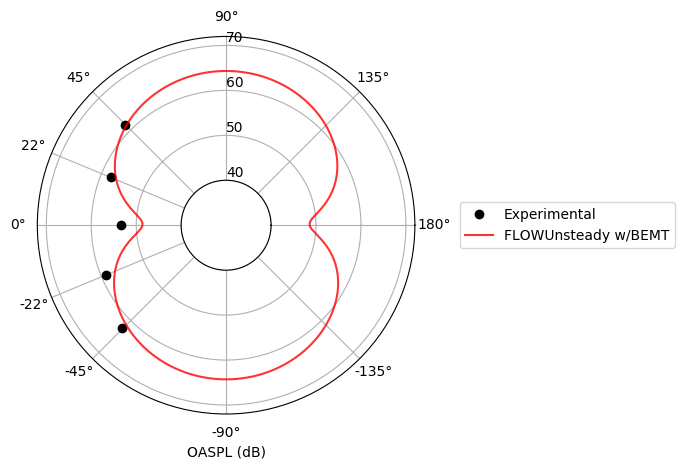

In [72]:
fieldname    = "OASPLdB"        # Field to plot

# Plot experimental data reported by Zawodny et al., Fig. 12
data_exp = CSV.read(joinpath("data", "zawodnydigitization2",
                                        "zawodny_fig12_left_5400_00.csv"), datarow=1)
polar(pi/180*data_exp[!, 2], data_exp[!, 1], "ok", label="Experimental")

# Grab angles
pointangles = pangle.(1:grid.nnodes)

# Plot datasets
for (lbl, _, _, freq_bins_bpm, stl, clr) in dataset_infos

    # Fetch tonal noise
    data_psw = datasets_psw[lbl][fieldname]
    yi = data_psw["hs"]["TotalOASPLdB"]
    oaspl_psw = data_psw["field"][:, 1, 1, yi]
    
    # Fetch broadband noise
    data_bpm = datasets_bpm[lbl][fieldname]
    oaspl_bpm = data_bpm["field"][:]
    
    # Add tonal and broadband OASPL together
    oaspl = noise.addSPL(oaspl_psw, oaspl_bpm)
    
    polar(pi/180*pointangles, oaspl, stl, label=lbl, alpha=0.8, color=clr)
end

ax = gca()
ax.set_theta_zero_location("W")
ax.set_theta_direction(-1)
ax.set_thetalim(pi/180*180*[1, -1])
ax.set_rlabel_position(90)
ax.set_rticks(40:10:70)
ax.set_rlim([40, 72])
ax.set_rorigin(30)
ax.set_thetagrids(collect(-180:45/2:180)[[3, 5, 7, 8, 9, 10, 11, 13, 15, 17]])
ax.grid(true)
xlabel("OASPL (dB)")
legend(loc="center left", bbox_to_anchor=(1.1, 0.5))
tight_layout();

### A-weighted Overall SPL Directivity

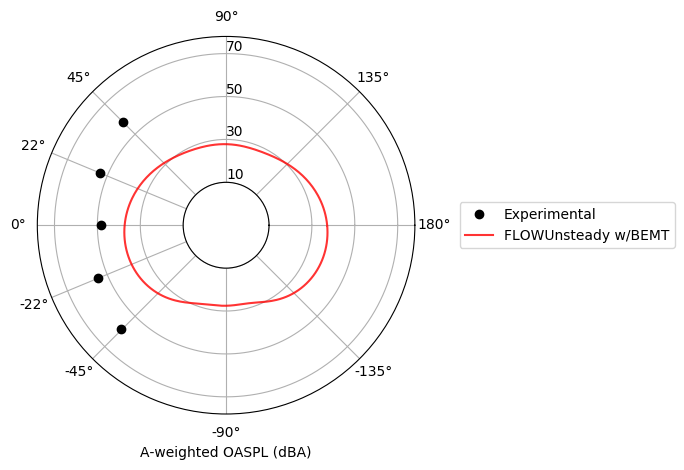

In [80]:
fieldname    = "OASPLdBA"        # Field to plot

# Plot experimental data reported by Zawodny et al., Fig. 12
data_exp = CSV.read(joinpath("data", "zawodnydigitization2",
                                        "zawodny_fig12_right_5400_00.csv"), datarow=1)
polar(pi/180*data_exp[!, 2], data_exp[!, 1], "ok", label="Experimental")

# Grab angles
pointangles = pangle.(1:grid.nnodes)

# Plot datasets
for (lbl, _, _, freq_bins_bpm, stl, clr) in dataset_infos

    # Fetch tonal noise
    data_psw = datasets_psw[lbl][fieldname]
    yi = data_psw["hs"]["TotalOASPLdBA"]
    oaspl_psw = data_psw["field"][:, 1, 1, yi]
    
    # Fetch broadband noise
    data_bpm = datasets_bpm[lbl][fieldname]
    oaspl_bpm = data_bpm["field"][:]
    
    # Add tonal and broadband OASPL together
    oaspl = noise.addSPL(oaspl_psw, oaspl_bpm)
    
    polar(pi/180*pointangles, oaspl, stl, label=lbl, alpha=0.8, color=clr)
end

ax = gca()
ax.set_theta_zero_location("W")
ax.set_theta_direction(-1)
ax.set_thetalim(pi/180*180*[1, -1])
ax.set_rlabel_position(90)
ax.set_rticks(10:20:70)
ax.set_rlim([10, 78])
ax.set_rorigin(-10)
ax.set_thetagrids(collect(-180:45/2:180)[[3, 5, 7, 8, 9, 10, 11, 13, 15, 17]])
ax.grid(true)
xlabel("A-weighted OASPL (dBA)")
legend(loc="center left", bbox_to_anchor=(1.1, 0.5))
tight_layout();